In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
tips = pd.read_csv(r"tips.csv")

In [21]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
tips.shape

(244, 7)

In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [24]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [101]:
tips.tip.mean()

2.99827868852459

In [66]:
#show data for top 5 tip amount
g=tips.sort_values('tip', ascending = False).head()
g

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [83]:
pd.pivot_table(data=tips,values=["tip","total_bill"],index=["sex","smoker"])

tip  total_bill
sex    smoker                      
Female No      2.773519   18.105185
       Yes     2.931515   17.977879
Male   No      3.113402   19.791237
       Yes     3.051167   22.284500

In [90]:
record=pd.pivot_table(tips,values=["tip"], index=["day","time"] )
record

tip
day  time            
Fri  Dinner  2.940000
     Lunch   2.382857
Sat  Dinner  2.993103
Sun  Dinner  3.255132
Thur Dinner  3.000000
     Lunch   2.767705

<Axes: xlabel='total_bill', ylabel='tip'>

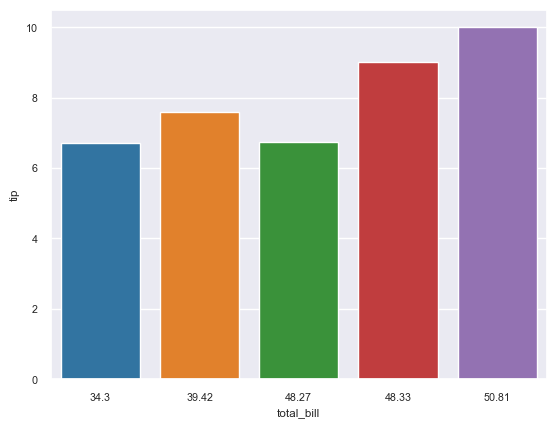

In [67]:
#plot total bill vs tip for top 5 tip amount

sns.barplot(data=g,x="total_bill", y="tip")

Text(0, 0.5, 'Number of tips')

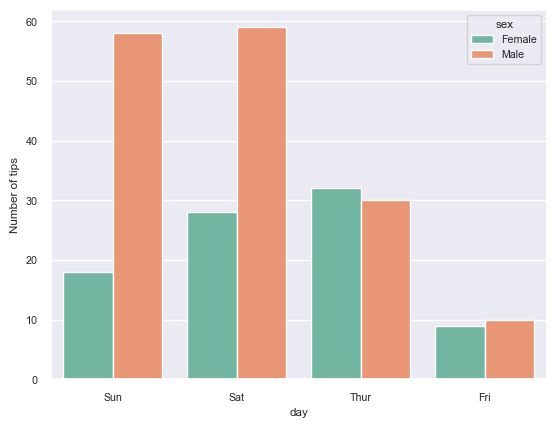

In [96]:
sns.set_context('notebook',font_scale=0.7)
a=sns.countplot(x='day',data=tips,palette='Set2',hue='sex')
a.set_ylabel("Number of tips")

C:\Users\Kritika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


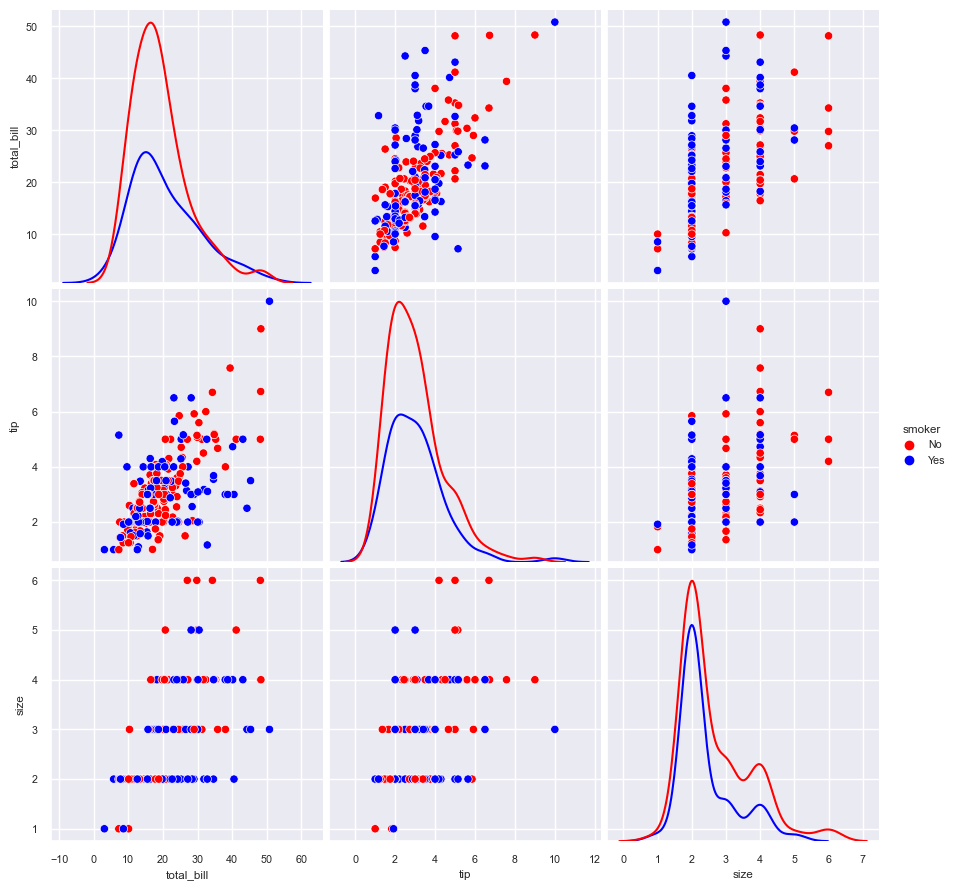

In [69]:
sns.pairplot(tips, hue = 'smoker', palette=['red','blue'],
 diag_kws=dict(fill=False), height=3)

C:\Users\Kritika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


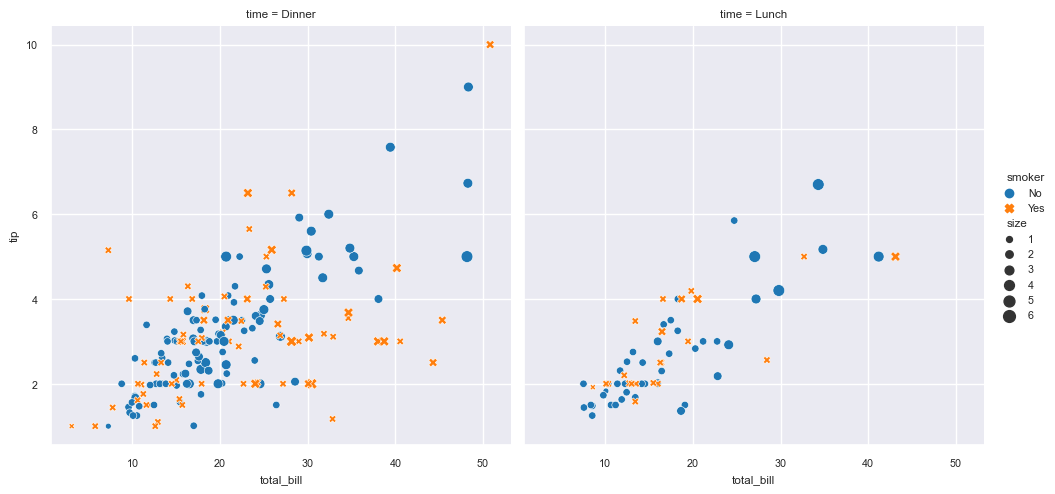

In [71]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",)


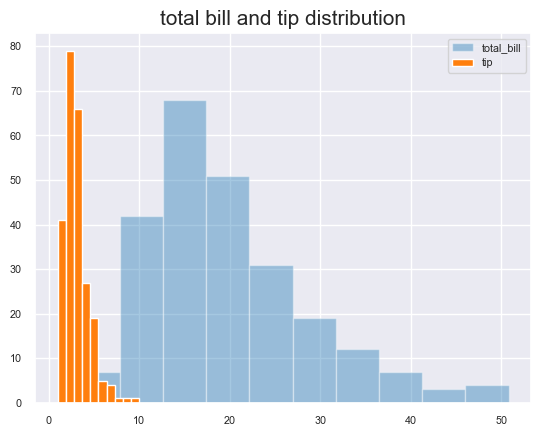

In [100]:
plt.title("total bill and tip distribution",fontsize=15)
plt.hist(tips.total_bill,alpha=0.4)
plt.hist(tips.tip)
plt.legend(['total_bill','tip'])